# Fire Detection with Train and Test Dataset

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from IPython.display import display, clear_output
import ipywidgets as widgets
import io
from PIL import Image
import glob
import pathlib
from keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate, BatchNormalization

In [2]:
train_data_dir = "D:/study/tutorialPoint/Questions- 6033361013\Data/Train_Data"  
test_data_dir = "D:/study/tutorialPoint/Questions- 6033361013\Data/Test_Data"  
train_dir = pathlib.Path(train_data_dir)
test_dir = pathlib.Path(test_data_dir)

### Data Preperation





In [3]:
labels = ['Non_Fire', 'Fire']
X_train = []
y_train = []
X_test = []
y_test = []
image_size = (224, 224)  # Target size for resizing the images

# Read images from the training directory
for label in labels:
    folder_path = os.path.join(train_data_dir, label)
    for file_name in tqdm(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file_name)
        try:
            img = Image.open(file_path)
            img.thumbnail(image_size, Image.ANTIALIAS)
            padded_img = Image.new("RGB", image_size)
            padded_img.paste(img, ((image_size[0] - img.size[0]) // 2, (image_size[1] - img.size[1]) // 2))
            img_array = np.array(padded_img) / 255.0  # Normalize the pixel values
            X_train.append(img_array)
            y_train.append(label)
        except Exception as e:
            print(f"Error reading image: {file_path}")
            print(str(e))

# Read images from the testing directory
for label in labels:
    folder_path = os.path.join(test_data_dir, label)
    for file_name in tqdm(os.listdir(folder_path)):
        file_path = os.path.join(folder_path, file_name)
        try:
            img = Image.open(file_path)
            img.thumbnail(image_size, Image.ANTIALIAS)
            padded_img = Image.new("RGB", image_size)
            padded_img.paste(img, ((image_size[0] - img.size[0]) // 2, (image_size[1] - img.size[1]) // 2))
            img_array = np.array(padded_img) / 255.0  # Normalize the pixel values
            X_test.append(img_array)
            y_test.append(label)
        except Exception as e:
            print(f"Error reading image: {file_path}")
            print(str(e))

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


 27%|█████████████████████                                                         | 674/2500 [00:04<00:16, 109.83it/s]

Error reading image: D:/study/tutorialPoint/Questions- 6033361013\Data/Train_Data\Fire\F_1574.jpg
cannot identify image file 'D:/study/tutorialPoint/Questions- 6033361013\\Data/Train_Data\\Fire\\F_1574.jpg'


 86%|██████████████████████████████████████████████████████████████████▎          | 2152/2500 [00:50<00:01, 298.52it/s]

Error reading image: D:/study/tutorialPoint/Questions- 6033361013\Data/Train_Data\Fire\F_585.jpg
cannot identify image file 'D:/study/tutorialPoint/Questions- 6033361013\\Data/Train_Data\\Fire\\F_585.jpg'
Error reading image: D:/study/tutorialPoint/Questions- 6033361013\Data/Train_Data\Fire\F_586.jpg
cannot identify image file 'D:/study/tutorialPoint/Questions- 6033361013\\Data/Train_Data\\Fire\\F_586.jpg'
Error reading image: D:/study/tutorialPoint/Questions- 6033361013\Data/Train_Data\Fire\F_587.jpg
cannot identify image file 'D:/study/tutorialPoint/Questions- 6033361013\\Data/Train_Data\\Fire\\F_587.jpg'
Error reading image: D:/study/tutorialPoint/Questions- 6033361013\Data/Train_Data\Fire\F_589.jpg
cannot identify image file 'D:/study/tutorialPoint/Questions- 6033361013\\Data/Train_Data\\Fire\\F_589.jpg'
Error reading image: D:/study/tutorialPoint/Questions- 6033361013\Data/Train_Data\Fire\F_59.jpg
cannot identify image file 'D:/study/tutorialPoint/Questions- 6033361013\\Data/Train

 92%|██████████████████████████████████████████████████████████████████████▊      | 2300/2500 [00:50<00:00, 553.98it/s]

Error reading image: D:/study/tutorialPoint/Questions- 6033361013\Data/Train_Data\Fire\F_739.jpg
cannot identify image file 'D:/study/tutorialPoint/Questions- 6033361013\\Data/Train_Data\\Fire\\F_739.jpg'
Error reading image: D:/study/tutorialPoint/Questions- 6033361013\Data/Train_Data\Fire\F_74.jpg
cannot identify image file 'D:/study/tutorialPoint/Questions- 6033361013\\Data/Train_Data\\Fire\\F_74.jpg'
Error reading image: D:/study/tutorialPoint/Questions- 6033361013\Data/Train_Data\Fire\F_740.jpg
cannot identify image file 'D:/study/tutorialPoint/Questions- 6033361013\\Data/Train_Data\\Fire\\F_740.jpg'
Error reading image: D:/study/tutorialPoint/Questions- 6033361013\Data/Train_Data\Fire\F_741.jpg
cannot identify image file 'D:/study/tutorialPoint/Questions- 6033361013\\Data/Train_Data\\Fire\\F_741.jpg'
Error reading image: D:/study/tutorialPoint/Questions- 6033361013\Data/Train_Data\Fire\F_742.jpg
cannot identify image file 'D:/study/tutorialPoint/Questions- 6033361013\\Data/Train_

 97%|██████████████████████████████████████████████████████████████████████████▊  | 2429/2500 [00:50<00:00, 535.42it/s]

Error reading image: D:/study/tutorialPoint/Questions- 6033361013\Data/Train_Data\Fire\F_935.jpg
cannot identify image file 'D:/study/tutorialPoint/Questions- 6033361013\\Data/Train_Data\\Fire\\F_935.jpg'
Error reading image: D:/study/tutorialPoint/Questions- 6033361013\Data/Train_Data\Fire\F_936.jpg
cannot identify image file 'D:/study/tutorialPoint/Questions- 6033361013\\Data/Train_Data\\Fire\\F_936.jpg'
Error reading image: D:/study/tutorialPoint/Questions- 6033361013\Data/Train_Data\Fire\F_937.jpg
cannot identify image file 'D:/study/tutorialPoint/Questions- 6033361013\\Data/Train_Data\\Fire\\F_937.jpg'
Error reading image: D:/study/tutorialPoint/Questions- 6033361013\Data/Train_Data\Fire\F_938.jpg
cannot identify image file 'D:/study/tutorialPoint/Questions- 6033361013\\Data/Train_Data\\Fire\\F_938.jpg'
Error reading image: D:/study/tutorialPoint/Questions- 6033361013\Data/Train_Data\Fire\F_939.jpg
cannot identify image file 'D:/study/tutorialPoint/Questions- 6033361013\\Data/Trai

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 30.72it/s]


### Visualize some of the images from our dataset

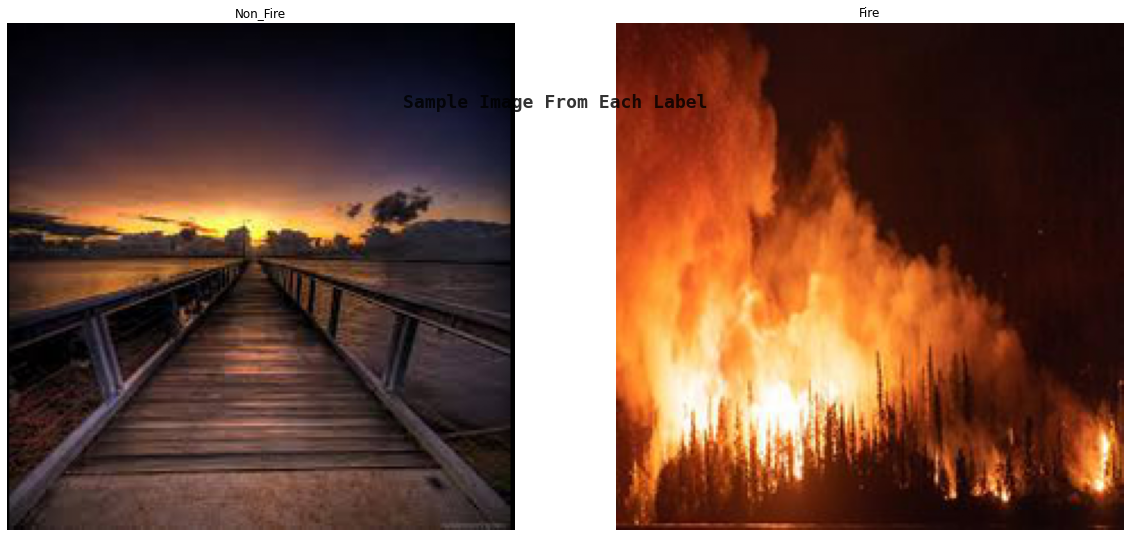

In [4]:
k=0
fig, ax = plt.subplots(1,2,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

### Shuffle the train set

In [5]:
X_train, y_train = shuffle(X_train,y_train, random_state=14)

D:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

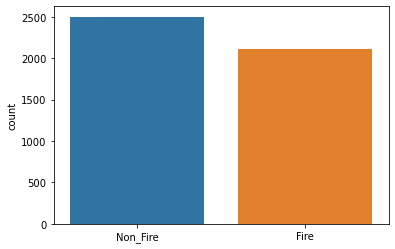

In [6]:
sns.countplot(y_train)

D:\Program Files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

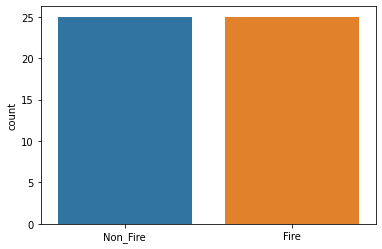

In [7]:
sns.countplot(y_test)

### Performing One Hot Encoding on the labels after converting it into numerical values

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

##Dividing the dataset into Training and Testing sets.




In [9]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, test_size=0.3,random_state=42)

## Building the Model

### Creating a Layer for Resizing and Normalization
Before we feed our images to network, we should be resizing it to the desired size. 
Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256).
This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it

#### Data Augmentation


In [10]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range=0.1,  # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

### Train model

In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, verbose=1, min_delta=1e-4),
    ModelCheckpoint('model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
]

tensorboard = TensorBoard(log_dir = 'logs')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)


### Model Architecture
We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

In [12]:
image_size = 224

model_cnn = Sequential()

model_cnn.add(Conv2D(64, (3, 3), padding='same', input_shape=(image_size, image_size, 3)))
model_cnn.add(Activation('relu'))
model_cnn.add(BatchNormalization())

model_cnn.add(Conv2D(64, (3, 3)))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.35))

model_cnn.add(Conv2D(64, (3, 3)))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(BatchNormalization())
model_cnn.add(Dropout(0.35))

model_cnn.add(Conv2D(64, (3, 3), padding='same'))
model_cnn.add(Activation('relu'))
model_cnn.add(BatchNormalization())

model_cnn.add(Flatten())
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(512))
model_cnn.add(Activation('relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(Dense(2))
model_cnn.add(Activation('softmax'))

model_cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 222, 222, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                      

### Compiling the Model
We use `adam` Optimizer, `CategoricalCrossentropy` for losses, `accuracy` as a metric

In [13]:
from keras.utils.vis_utils import plot_model
plot_model(model_cnn, to_file='model_cnn_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [14]:
model_cnn.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [15]:
history = model_cnn.fit(X_train, y_train,validation_split=0.1, verbose=1, batch_size = 32, validation_data = (X_val, y_val),
                     epochs = 10, callbacks = callbacks)

Epoch 1/10
101/101 [==============================] - ETA: 0s - loss: 0.3893 - accuracy: 0.8918
Epoch 1: val_loss improved from inf to 0.75002, saving model to model.h5
101/101 [==============================] - 696s 7s/step - loss: 0.3893 - accuracy: 0.8918 - val_loss: 0.7500 - val_accuracy: 0.5549
Epoch 2/10
101/101 [==============================] - ETA: 0s - loss: 0.1589 - accuracy: 0.9374
Epoch 2: val_loss improved from 0.75002 to 0.63365, saving model to model.h5
101/101 [==============================] - 723s 7s/step - loss: 0.1589 - accuracy: 0.9374 - val_loss: 0.6337 - val_accuracy: 0.5990
Epoch 3/10
101/101 [==============================] - ETA: 0s - loss: 0.1544 - accuracy: 0.9352
Epoch 3: val_loss did not improve from 0.63365
101/101 [==============================] - 693s 7s/step - loss: 0.1544 - accuracy: 0.9352 - val_loss: 1.2852 - val_accuracy: 0.4646
Epoch 4/10
101/101 [==============================] - ETA: 0s - loss: 0.1355 - accuracy: 0.9486
Epoch 4: val_loss impro

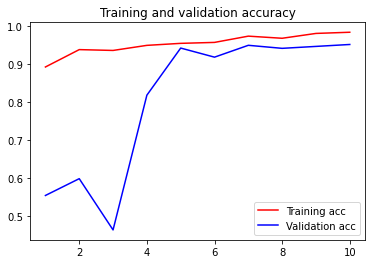

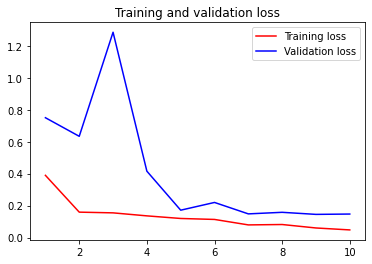

In [16]:
model_cnn.save('model.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Checking on test data set

In [17]:
history.history['loss']

[0.38926878571510315,
 0.15885864198207855,
 0.15435585379600525,
 0.13554918766021729,
 0.11921616643667221,
 0.11319469660520554,
 0.07893826812505722,
 0.08139500766992569,
 0.05974546819925308,
 0.04758230969309807]

In [18]:
history.history['accuracy']

[0.8918499946594238,
 0.93740314245224,
 0.9352339506149292,
 0.948559045791626,
 0.9538270831108093,
 0.9563061594963074,
 0.9727301001548767,
 0.9671521782875061,
 0.9798574447631836,
 0.9829562902450562]

In [19]:
pred = model_cnn.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

2/2 [==============================] - 2s 617ms/step


In [20]:
accuracy = np.sum(pred==y_test_new)/len(pred)
print("Accuracy on testing dataset: {:.2f}%".format(accuracy*100))

Accuracy on testing dataset: 90.00%


In [22]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        25
           1       0.88      0.92      0.90        25

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50



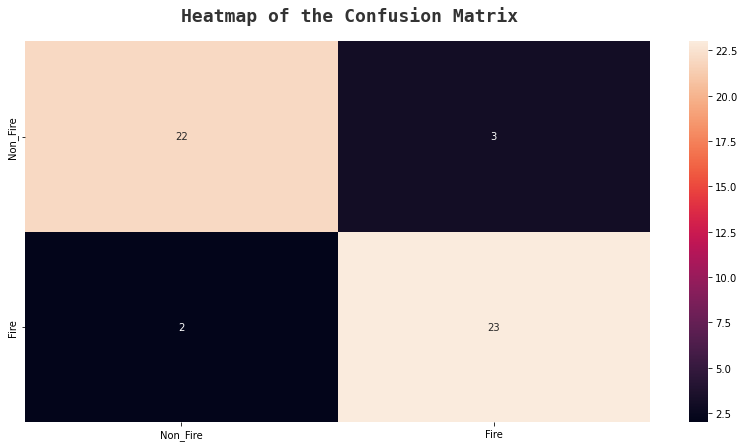

In [23]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True)
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',y=0.92,x=0.28,alpha=0.8)

plt.show()

In [38]:
test_data_dir = "D:/study/tutorialPoint/Questions- 6033361013/Data/Test"

# Function to preprocess the input image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize to match the input size of the model
    image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

Enter the index of the input image: 27
1/1 [==============================] - 0s 100ms/step


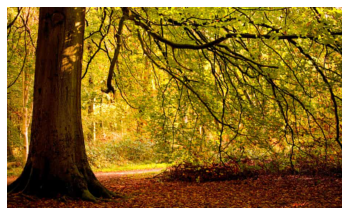

Predicted Label:  Not Fire
Confidence: 99.99%
True Label:  Test\NF_10
Binary Prediction:  1


In [39]:
# Get input image index from the user
image_index = int(input("Enter the index of the input image: "))

# Get the corresponding image path
image_paths = glob.glob(test_data_dir + '/*.jpg')
input_image_path = image_paths[image_index]

# Preprocess the input image
input_image = preprocess_image(input_image_path)

# Make predictions on the input image
predictions = model_cnn.predict(input_image)
predicted_class = np.argmax(predictions[0])

# Get the label corresponding to the predicted class
if predicted_class == 0:
    predicted_label = "Not Fire"  # Fire
else:
    predicted_label = "Fire"  # Non-fire

confidence = predictions[0][predicted_class]

# Get the true label for the input image
true_label = input_image_path.split('/')[-1].split('.')[0]

# Calculate accuracy
accuracy = 1 if predicted_label == true_label else 0

# Display the input image
image = Image.open(input_image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

# Display the prediction results
print("Predicted Label: ", predicted_label)
print("Confidence: {:.2f}%".format(confidence * 100))
print("True Label: ", true_label)
print("Binary Prediction: ", binary_prediction)